# Do you think you are paid fairly: An analysis of factors that affect annual salary -------- Codebook
## Hayden Truong, Tom Zhang

This is the code file of the project. It would demonstrate the source code for all data sets and diagrams used in the project.

## 1. Import Packages

Firstly, we would want to import all packages used for the analysis. Packages used include scipy, HTML functions, numpy, pandas, matplotlib, seaborn, statsmodels, stargazer, plotly, and array.

In [26]:
#Package Setup
import scipy.stats as stats
from IPython.core.display import HTML
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.optimize import minimize
from stargazer.stargazer import Stargazer
import plotly as plty
import statsmodels.api as sm
from scipy.stats import spearmanr
from html import escape
import array as arr

## 2. Data Set

Then we would also want to upload the data set into our environment.

In [29]:
#Import data set
data = pd.read_csv('usa_00002.csv')

#Change data frame into a more accessible format, a pandas data frame
data = pd.DataFrame(data)

#Provide a brief description of the data set
data.describe()

,YEAR,NCHILD,SEX,AGE,MARST,BIRTHYR,RACE,RACED,CITIZEN,YRSUSA1,...,DEGFIELDD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,INCWAGE,INCINVST,DIFFREM,DIFFSENS
count,3252599.0,3.252599e+06,3.252599e+06,3.252599e+06,3.252599e+06,3.252599e+06,3.252599e+06,3.252599e+06,3.252599e+06,3.252599e+06,...,3.252599e+06,3.252599e+06,3.252599e+06,3.252599e+06,3.252599e+06,3.252599e+06,3.252599e+06,3.252599e+06,3.252599e+06,3.252599e+06
mean,2021.0,4.765801e-01,1.508804e+00,4.261730e+01,3.610626e+00,1.978383e+03,2.531918e+00,2.573677e+02,3.087805e-01,3.464465e+00,...,1.157103e+03,1.554270e+00,1.557771e+01,2.459332e+03,3.790785e+03,1.609700e+06,1.962156e+05,1.593599e+05,1.013754e+00,1.063086e+00
std,0.0,9.354969e-01,4.999226e-01,2.387738e+01,2.308894e+00,2.387738e+01,2.599478e+00,2.670510e+02,8.187944e-01,1.076484e+01,...,2.113806e+03,1.131287e+00,1.130017e+01,2.928118e+03,3.735830e+03,3.622365e+06,3.667757e+05,3.634547e+05,3.270003e-01,2.431185e-01
min,2021.0,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.925000e+03,1.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.110000e+04,0.000000e+00,-6.300000e+03,0.000000e+00,1.000000e+00
25%,2021.0,0.000000e+00,1.000000e+00,2.200000e+01,1.000000e+00,1.959000e+03,1.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.160000e+04,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,2021.0,0.000000e+00,2.000000e+00,4.300000e+01,4.000000e+00,1.978000e+03,1.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,1.000000e+01,8.450000e+02,3.470000e+03,3.700000e+04,2.300000e+04,0.000000e+00,1.000000e+00,1.000000e+00
75%,2021.0,1.000000e+00,2.000000e+00,6.200000e+01,6.000000e+00,1.999000e+03,2.000000e+00,2.000000e+02,0.000000e+00,0.000000e+00,...,1.903000e+03,3.000000e+00,3.000000e+01,4.700000e+03,7.860000e+03,9.806000e+04,9.000000e+04,8.000000e+01,1.000000e+00,1.000000e+00
max,2021.0,9.000000e+00,2.000000e+00,9.600000e+01,6.000000e+00,2.021000e+03,9.000000e+00,9.900000e+02,3.000000e+00,8.700000e+01,...,6.403000e+03,3.000000e+00,3.000000e+01,9.920000e+03,9.920000e+03,9.999999e+06,9.999990e+05,9.999990e+05,2.000000e+00,2.000000e+00


## 3. Data Cleaning

We would want to perform cleaning before doing visualization or regression on the data. This includes variable sets that would be demonstrated below.

Firstly, we would want to select 100,000 sets of data out of the data set. That is because we have more than 3 million observations, which would take huge runtime to perform data analysis and data cleaning while also being hard to perform plots with clear visualziations.

In [30]:
#Take 100,000 samples out of the original data
data = data.sample(n = 100000)

Then we would want to perform the data cleaning process. We would want to start by renaming confusing variable names into relatively straight forward names.

In [32]:
#Rename the variable names that can be confusing
data = data.rename(columns={'MARST':'MAR_STATUS', 'DIFFREM':'COGDIS', 'DIFFSENS':'VISDIS'})

Then we would want to start performing data cleaning on other variables. We would want to start by recoding age. This includes grouping age into different age groups and dropping irrelavant vairbles in the analysis.

In [33]:
#Loop through all age values in the data set
for i in range(120):
    
    #Start by dropping ages that are too low to work, which produces irrelavant values
    if i <= 16:
        wrong = data[data['AGE']==i]
        data = data.drop(wrong.index) #Drop the age below legal working age
    
    #Then group different ages into age groups
    elif i <= 25:
        data['AGE'] = data['AGE'].replace(i, '16-25')
    
    elif i <= 35:
        data['AGE'] = data['AGE'].replace(i, '26-35')
    
    elif i <= 45:
        data['AGE'] = data['AGE'].replace(i, '36-45')
    
    elif i <= 55:
        data['AGE'] = data['AGE'].replace(i, '46-55')
    
    elif i <= 70:
        data['AGE'] = data['AGE'].replace(i, '56-70')
    
    #Lastly, drop the age above retirement age
    else:
        wrong = data[data['AGE']==i]
        data = data.drop(wrong.index) 

#Generate an Age_avg dummy variable in order to perform data analysis on age groups
data["Age_avg"] = data["AGE"].map({"16-25": 20, "26-35": 30, "36-45": 40, "46-55": 50, "56-70": 63})

After cleaning the age variable, we would also want to clean the other irrelevant data.

In [34]:
#Drop irrelevant data in income variables

#According to the index, 9999999 and 1 are irrelevant values for total income
wrong2 = data[data['INCTOT']==9999999]
data = data.drop(wrong2.index)

wrong3 = data[data['INCTOT']==1]
data = data.drop(wrong3.index)

#We would not want to include people with 0 income in our investigation because they may have chose not to participate 
#in the labor market, which does not demonstrate their skill set
wrong4 = data[data['INCTOT']<=0]
data = data.drop(wrong4.index)

#The same would work for wage income, except that irrelevant value of 1 is not present
wrong5 = data[data['INCWAGE']==999999]
data = data.drop(wrong5.index)

wrong7 = data[data['INCWAGE']==0]
data = data.drop(wrong7.index)

#Industries above the index of 8700 are not defined so we have to drop them
wrong6 = data[data['IND']>8700]
data = data.drop(wrong6.index)

After these cleaning processes, we can reach to our final step. We would want to sample 1000 of the cleaned data for our final investigation. This would make sure that the data we are working with is clean, has abundant value while not restrict the run time and visualizability of the diagrams.

In [35]:
data_sample = data.sample(1000)
data_sample.describe()

,YEAR,NCHILD,SEX,MAR_STATUS,BIRTHYR,RACE,RACED,CITIZEN,YRSUSA1,SPEAKENG,...,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,INCWAGE,INCINVST,COGDIS,VISDIS,Age_avg
count,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2021.0,0.788000,1.495000,3.124000,1979.416000,2.442000,247.578000,0.355000,3.739000,3.236000,...,1.147000,11.504000,4116.792000,6233.101000,63445.850000,58341.430000,1371.590000,1.030000,1.028000,41.392000
std,0.0,1.093733,0.500225,2.294316,14.489061,2.511363,257.340156,0.865866,10.478391,0.665392,...,0.493594,4.932577,2713.820448,2419.865311,79214.317729,72675.771443,17891.592558,0.170673,0.165055,14.992769
min,2021.0,0.000000,1.000000,1.000000,1951.000000,1.000000,100.000000,0.000000,0.000000,1.000000,...,1.000000,10.000000,10.000000,170.000000,20.000000,20.000000,-2400.000000,1.000000,1.000000,20.000000
25%,2021.0,0.000000,1.000000,1.000000,1967.000000,1.000000,100.000000,0.000000,0.000000,3.000000,...,1.000000,10.000000,2205.000000,4971.000000,21600.000000,19000.000000,0.000000,1.000000,1.000000,30.000000
50%,2021.0,0.000000,1.000000,1.000000,1980.000000,1.000000,100.000000,0.000000,0.000000,3.000000,...,1.000000,10.000000,4020.000000,7280.000000,41500.000000,40000.000000,0.000000,1.000000,1.000000,40.000000
75%,2021.0,1.000000,2.000000,6.000000,1991.000000,2.000000,200.000000,0.000000,0.000000,3.000000,...,1.000000,10.000000,5712.500000,7890.000000,75000.000000,70500.000000,0.000000,1.000000,1.000000,50.000000
max,2021.0,8.000000,2.000000,6.000000,2004.000000,9.000000,925.000000,3.000000,63.000000,6.000000,...,3.000000,30.000000,9720.000000,8690.000000,662000.000000,626000.000000,411000.000000,2.000000,2.000000,63.000000


## 4. Basic Data Visualization

We would next want to do some basic visualization on the data. 

Firstly, we want a few visualizations of the distribution of income.

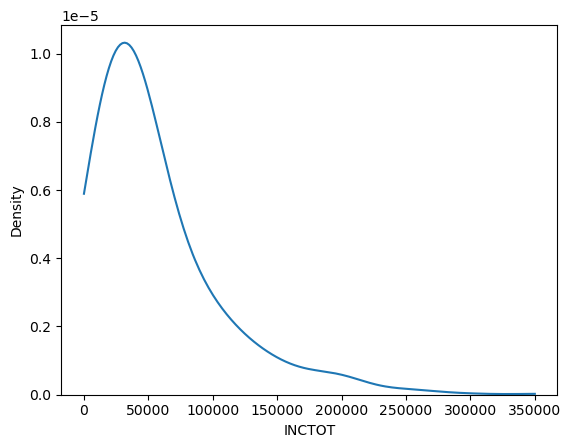

In [36]:
#Distribution of total income
sns.kdeplot(data_sample["INCTOT"], 
            #Restrict the range in order to prevent negative values and large skewness
            clip = (0, 350000))

#Save the plot
plt.savefig("INCTOT_distribution.png")

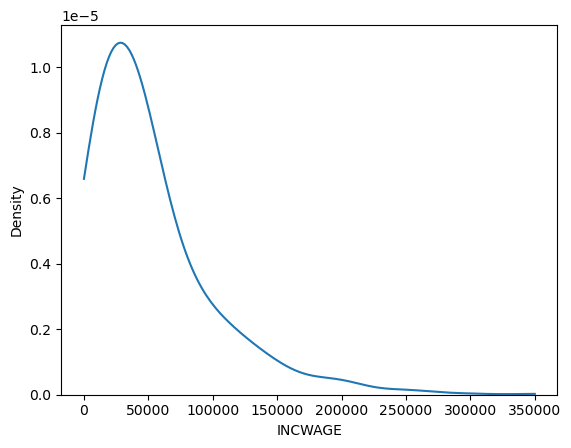

In [37]:
#Distribution of wage and salary income, this part is a replication of the previous code on INCWAGE
sns.kdeplot(data_sample["INCWAGE"], clip = (0, 350000))
plt.savefig("INCTOT_distribution.png")

Then we would want a visualization of peronsal income distributions accross different age groups and sexes.

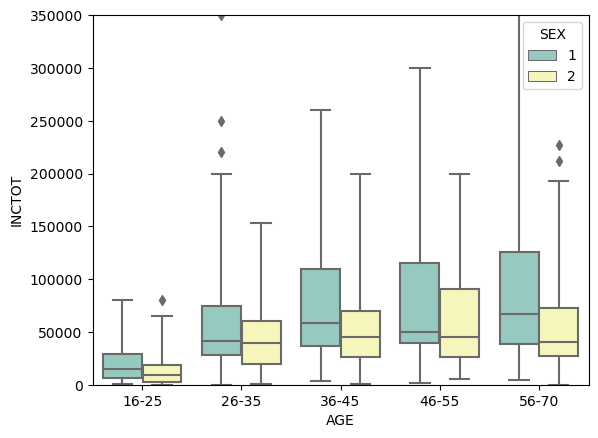

In [51]:
#We would want to show the distribution of total personal income in different age and sex groups using box plots
box = sns.boxplot(
    
    #Group by age first
    x="AGE", 
    
    #The variable we are interested in is total personal income
    y="INCTOT", 
    
    #Also group by sex
    hue="SEX", 
    
    #Choose the data
    data=data_sample, 
    
    #Customize order to fit different age groups
    order = ["16-25", "26-35", "36-45", "46-55", "56-70"], 
    
    #Other customize settings
    whis = 3, palette="Set3")
box.set_ylim(0, 350000)

#Save figure
plt.savefig("Sex_age_box.png")

We would also want to get to know our sample better. We would want to know the componenets of different demographic values.

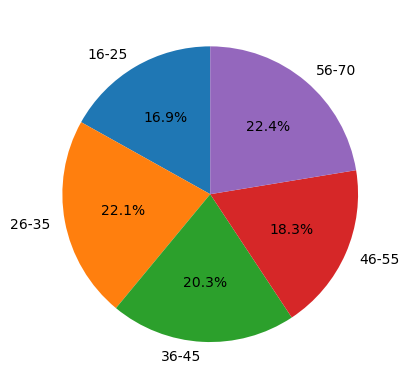

In [52]:
#We would want to include a pie chart

#To start with, we would want to get the counts of different age groups
counts = data_sample['AGE'].value_counts()[['16-25', '26-35', '36-45', '46-55', '56-70']]

#Then we would want to set up variables for the pie chart
count_values = counts.values
index = counts.index.values

#Generate the pie chart
plt.pie(count_values, labels=index, autopct='%1.1f%%', startangle=90)

#Save the chart
plt.savefig("age_group.png")

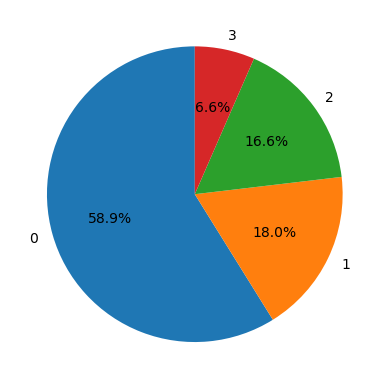

In [55]:
#Similar process for number of children
counts = data_sample['NCHILD'].value_counts()[[0, 1, 2, 3, 4]]

count_values = [counts[0], counts[1], counts[2], sum(counts[3:4])]
index = arr.array("u",'0' + '1' + '2' + '3')

plt.pie(count_values, labels=index, autopct='%1.1f%%', startangle=90)

plt.savefig("nchild.png")

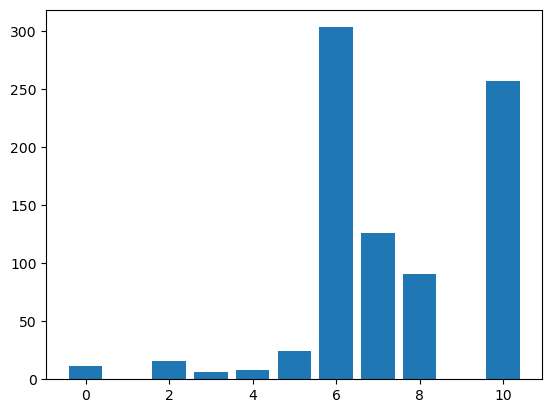

In [56]:
#For Education, there are too many groups so we would want to generate a bar chart.
#The code is mostly similar
counts = data_sample['EDUC'].value_counts()[[0, 2, 3, 4, 5, 6, 7, 8, 10]]

count_values = counts.values
index = counts.index.values

plt.bar(index, count_values)

plt.savefig("education.png")

## 5. Regressions

We would want to do regressions the next step.

We would start by doing a regression seperately for each variable for both wage and salary income as well as total income.

In [39]:
#Set up each of the models

#Method used is OLS regression
child = smf.ols(   
    #Set up the formula: wage and salary income against number of children
    formula='INCWAGE ~ NCHILD', 
    #Choose data set and perform regression fit
    data=data_sample).fit()

#Perform same regression on other variables
age = smf.ols(formula='INCWAGE ~ Age_avg', data=data_sample).fit()
sex = smf.ols(formula='INCWAGE ~ SEX', data=data_sample).fit()
marital = smf.ols(formula='INCWAGE ~ MAR_STATUS', data=data_sample).fit()
citizen = smf.ols(formula='INCWAGE ~ CITIZEN', data=data_sample).fit()
english = smf.ols(formula='INCWAGE ~ SPEAKENG', data=data_sample).fit()
race = smf.ols(formula='INCWAGE ~ RACWHT', data=data_sample).fit()
edu = smf.ols(formula='INCWAGE ~ EDUC', data=data_sample).fit()
cog = smf.ols(formula='INCWAGE ~ COGDIS', data=data_sample).fit()
sens = smf.ols(formula='INCWAGE ~ VISDIS', data=data_sample).fit()

#We would also want a regression that includes all variables
all = smf.ols(
    #The formula this time is to add all of the variables together
    formula='INCWAGE ~ NCHILD + Age_avg + SEX + MAR_STATUS + CITIZEN + SPEAKENG + RACWHT + EDUC + COGDIS + VISDIS', 
    data=data_sample).fit()

#Include regressions in the stargazer method
st=Stargazer([child, age, sex, marital, citizen, english, race, edu, cog, sens, all])

#Put each of the variables into order
st.covariate_order(["NCHILD", 
                    "Age_avg", 
                    "SEX", 
                    "MAR_STATUS", 
                    "CITIZEN", 
                    "SPEAKENG", 
                    "RACWHT", 
                    "EDUC", 
                    "COGDIS", 
                    "VISDIS", 
                    "Intercept"])

#Show regression results
HTML(st.render_html())

In [40]:
#Apply the same process for total income
child = smf.ols(formula='INCTOT ~ NCHILD', data=data_sample).fit()
age = smf.ols(formula='INCTOT ~ Age_avg', data=data_sample).fit()
sex = smf.ols(formula='INCTOT ~ SEX', data=data_sample).fit()
marital = smf.ols(formula='INCTOT ~ MAR_STATUS', data=data_sample).fit()
citizen = smf.ols(formula='INCTOT ~ CITIZEN', data=data_sample).fit()
english = smf.ols(formula='INCTOT ~ SPEAKENG', data=data_sample).fit()
race = smf.ols(formula='INCTOT ~ RACWHT', data=data_sample).fit()
edu = smf.ols(formula='INCTOT ~ EDUC', data=data_sample).fit()
cog = smf.ols(formula='INCTOT ~ COGDIS', data=data_sample).fit()
sens = smf.ols(formula='INCTOT ~ VISDIS', data=data_sample).fit()
all = smf.ols(formula='INCTOT ~ NCHILD+ Age_avg+ SEX+ MAR_STATUS+ CITIZEN+SPEAKENG+RACWHT+EDUC+COGDIS+VISDIS', data=data_sample).fit()

st=Stargazer([child, age, sex, marital, citizen, english, race, edu, cog, sens, all])

st.covariate_order(["NCHILD", 
                    "Age_avg", 
                    "SEX", 
                    "MAR_STATUS", 
                    "CITIZEN", 
                    "SPEAKENG", 
                    "RACWHT", 
                    "EDUC", 
                    "COGDIS", 
                    "VISDIS", 
                    "Intercept"])

HTML(st.render_html())

We would also want to perform regressions on skill set variables and demographic variables seperately.

In [42]:
#We are using similar functions to run these regressions.

#In this case we are running regression for skill sets
skills = smf.ols(formula='INCTOT ~ EDUC + IND + SPEAKENG + COGDIS + VISDIS', data=data_sample).fit()

sk=Stargazer([skills])

sk.covariate_order(["EDUC", "IND", "SPEAKENG", "COGDIS", "VISDIS", "Intercept"])

HTML(sk.render_html())

#Save the regression
with open('skills.html', 'w') as f:
    f.write(sk.render_html())

In [43]:
#Similar to previous code block, just changing to demographic variables
demographics = smf.ols(formula='INCTOT ~ SEX + Age_avg + NCHILD + MAR_STATUS + CITIZEN  + RACWHT', data=data_sample).fit()

demo=Stargazer([demographics])

demo.covariate_order(["SEX", "Age_avg", "NCHILD", "MAR_STATUS", "CITIZEN", "RACWHT", "Intercept"])

with open('demographics.html', 'w') as f:
    f.write(demo.render_html())

## 6. Even more visualizations.

We would want to do joint plots to show several regression results in diagrams.

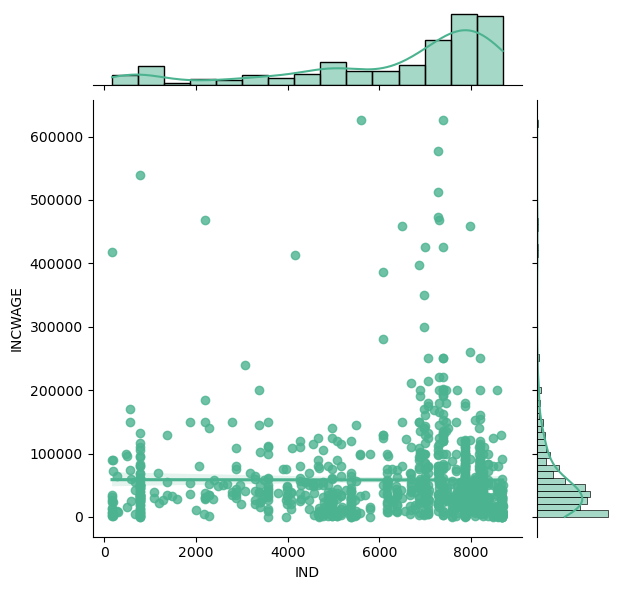

In [44]:
#Set up x and y variables
x = data_sample["IND"]
y = data_sample["INCWAGE"]

#Perform the joint plot
sns.jointplot(x=x, y=y, 
              #We would want results from a regression
              kind="reg", 
              color="#4CB391")

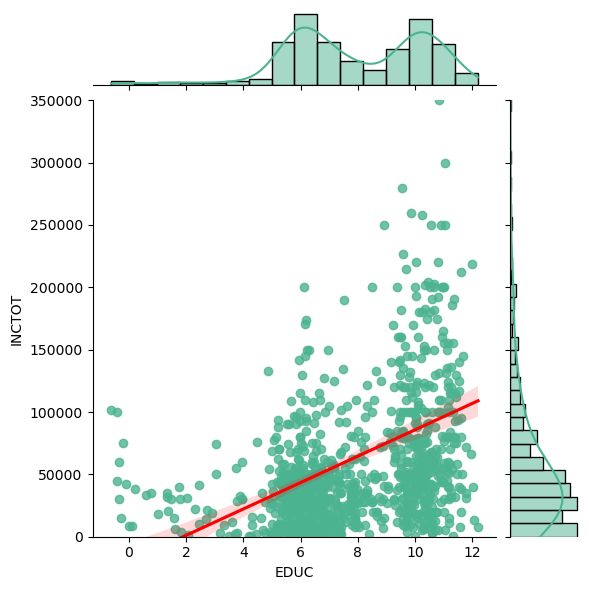

In [45]:
#We would want to include some noise in the education variable in order for the graph to be more visualizable
noise = np.random.normal( #The distribution of noise should be randomly normal distributed
    0, 0.5, size=len(data_sample))

#Include the noise in the education variable
x = data_sample["EDUC"] + noise
y = data_sample["INCTOT"]

#Perform the join plot
sns.jointplot(x=x, y=y, kind="reg", ylim = (0, 350000), color="#4CB391", line_kws={"color": "red"})

#Save the figure
plt.savefig("INCTOT_EDUC_joint.png")

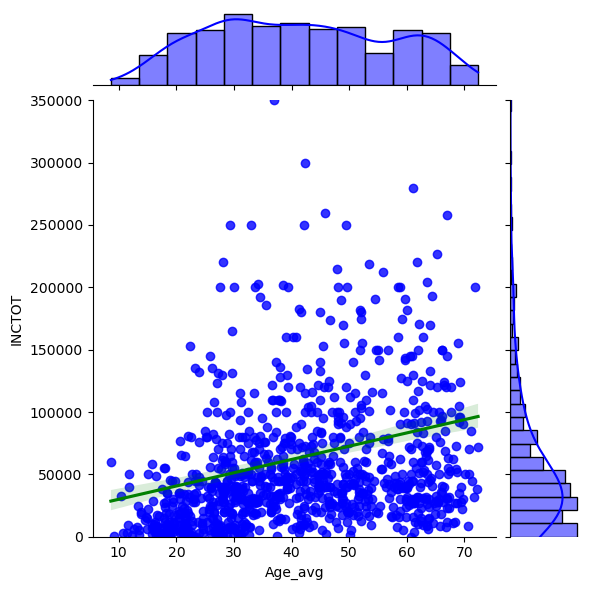

In [46]:
#Similar to previous plot, but on age
noise = np.random.normal(0, 4, size=len(data_sample))
x = data_sample["Age_avg"] + noise
y = data_sample["INCTOT"]
sns.jointplot(x=x, y=y, kind="reg", ylim = (0, 350000),color="blue", line_kws={"color": "green"})
plt.savefig("INCTOT_AGE_joint.png")

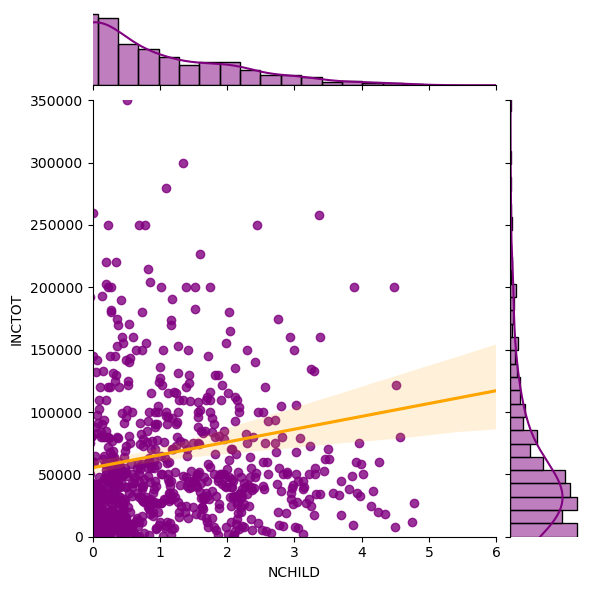

In [47]:
#Similar to previous plot, but on number of children
noise = np.random.normal(0, 0.4, size=len(data_sample))
x = data_sample["NCHILD"] + noise
y = data_sample["INCTOT"]
sns.jointplot(x=x, y=y, kind="reg", ylim = (0, 350000), xlim = (0,6), color="purple", line_kws={"color": "orange"})
plt.savefig("INCTOT_NCHILD_joint.png")

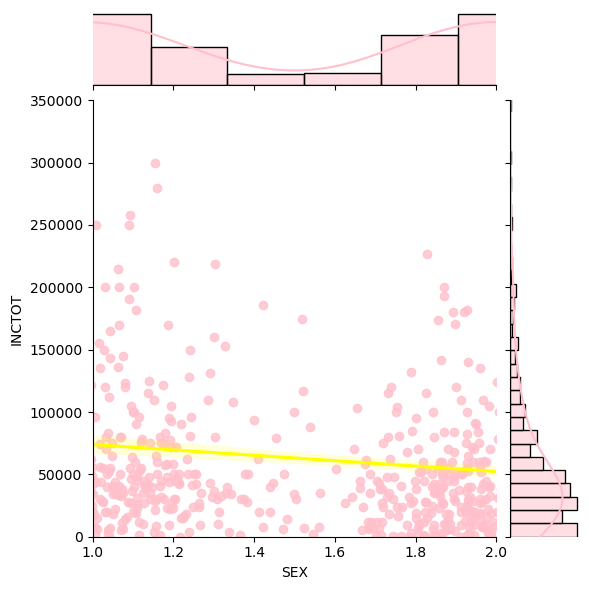

In [48]:
#Similar to previous plot, but on sex
noise = np.random.normal(0, 0.2, size=len(data_sample))
x = data_sample["SEX"] + noise
y = data_sample["INCTOT"]
sns.jointplot(x=x, y=y, kind="reg", ylim = (0, 350000), xlim = (1, 2), color="pink", line_kws={"color": "yellow"})
plt.savefig("INCTOT_SEX_joint.png")

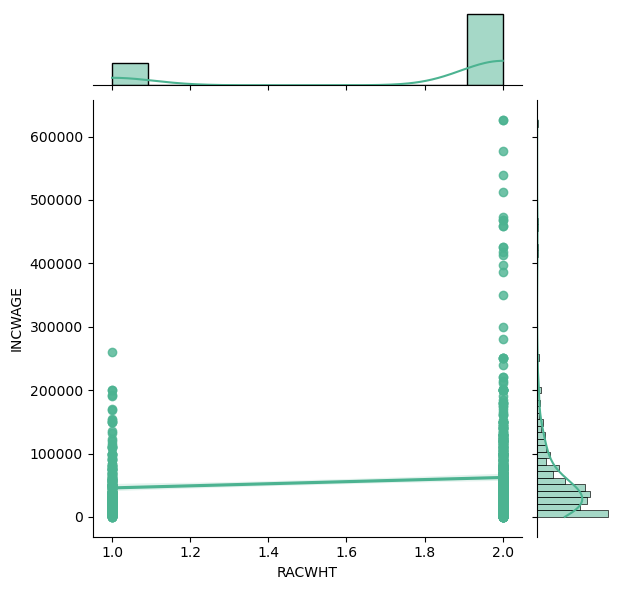

In [49]:
#Similar to previous plot, but on number of race
x = data_sample["RACWHT"]
y = data_sample["INCWAGE"]
sns.jointplot(x=x, y=y, kind="reg", color="#4CB391")